### Load Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import PIL
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Prepare/collect data

In [ ]:
import os

path = os.listdir('/content/drive/MyDrive/Dataset/')
classes = {'notumor':0, 'tumor':1}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

Feature Extraction Using HOG

In [ ]:
import cv2
from skimage.feature import hog

X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))

        # Extract HOG features
        hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys')

        X.append(hog_features)
        Y.append(classes[cls])

Feature extraction using LBP

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))

        # Compute LBP features
        radius = 3
        n_points = 8 * radius
        lbp = local_binary_pattern(img, n_points, radius, method='uniform')

        X.append(lbp.flatten())
        Y.append(classes[cls])


Feature extraction using PCA

In [ ]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Define the number of components for PCA
num_components = 100  # You can adjust this number based on your needs

X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)  # Read image in grayscale
        img = cv2.resize(img, (200, 200))

        # Flatten image into a 1D array
        img_flat = img.flatten()

        X.append(img_flat)
        Y.append(classes[cls])

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Perform PCA
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

# Now X_pca contains the PCA features


In [ ]:
X = np.array(X)
Y = np.array(Y)

#X = X.reshape(len(X), -1)

In [ ]:
X.shape


(3923, 40000)

In [ ]:
Y.shape

(3923,)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
X.shape


(3923, 200, 200)

### Visualize data

In [ ]:
# Reshape the array into a 2-dimensional array
#X_reshaped = X[2].reshape((100, 400))

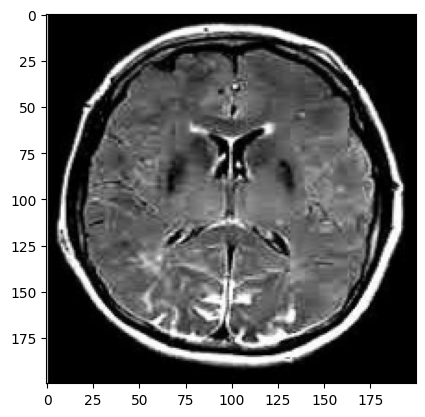

In [ ]:
plt.imshow(X[32], cmap='gray')

### Prepare data

In [ ]:
X = X.reshape(len(X), -1)
X.shape

(3923, 40000)

In [ ]:
#Y = Y.reshape(len(Y), -1)
Y.shape

(3923,)

### Split Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

### Train Model

### Evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1.Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
# Get the start time
start_time = time.time()

lr=LogisticRegressionCV(cv=5,random_state=2 )
model1=lr.fit(X_train,Y_train)

# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Elapsed time: 666.74 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

[[333   4]
 [  2 446]]
Testing Accuracy for Logistic Regression: 0.9923566878980892
Testing Sensitivity for Logistic Regression: 0.9940298507462687
Testing Specificity for Logistic Regression: 0.9911111111111112
Testing Precision for Logistic Regression: 0.9881305637982196
Testing F1-Score for Logistic Regression: 0.9910714285714286


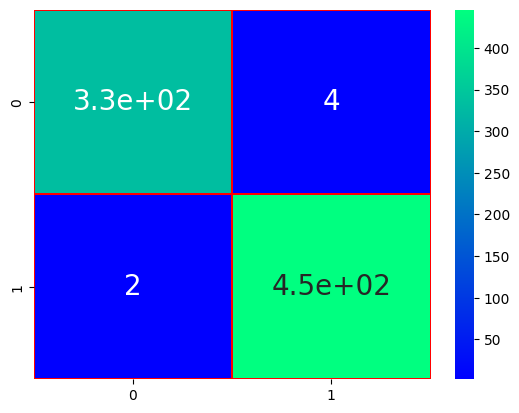

In [ ]:

prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,prediction1)
print(cm1)
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='RED',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))
print('Testing F1-Score for Logistic Regression:',(2 * TP / (2 * TP + FN + FP)))

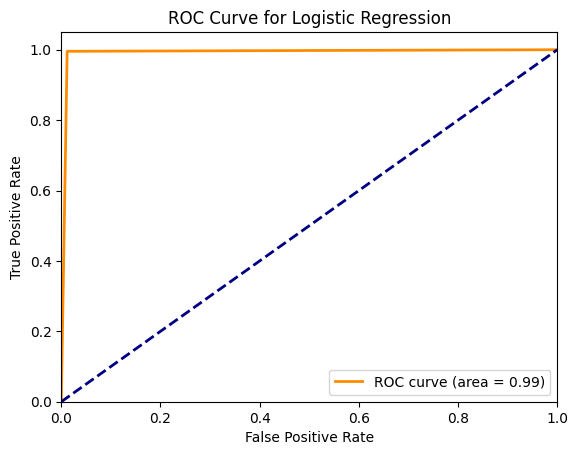

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction1)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       0.99      1.00      0.99       448

    accuracy                           0.99       785
   macro avg       0.99      0.99      0.99       785
weighted avg       0.99      0.99      0.99       785



2.Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
# Get the start time
start_time = time.time()

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
#cv_scores = cross_val_score(tree_model, X, Y, cv=10, scoring='accuracy')
model2=tree_model.fit(X_train,Y_train)
# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))
prediction2=model2.predict(X_test)
cm2= confusion_matrix(Y_test,prediction2)
print(cm2)
sns.heatmap(cm2, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))
print('Testing F1-Score for Decision Tree:',(2 * TP / (2 * TP + FN + FP)))

Elapsed time: 33.93 seconds


NameError: name 'confusion_matrix' is not defined

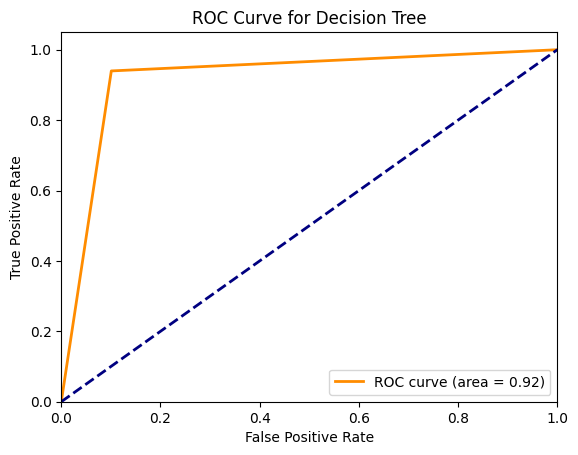

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction2)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction2))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       337
           1       0.93      0.94      0.93       448

    accuracy                           0.92       785
   macro avg       0.92      0.92      0.92       785
weighted avg       0.92      0.92      0.92       785



3.Random Forest

Elapsed time: 85.38 seconds
[[333   4]
 [  1 447]]
Testing Accuracy for Random Forest: 0.9936305732484076
Testing Sensitivity for Random Forest: 0.9970059880239521
Testing Specificity for Random Forest: 0.991130820399113
Testing Precision for Random Forest: 0.9881305637982196
Testing F1-Score for Random Forest: 0.992548435171386


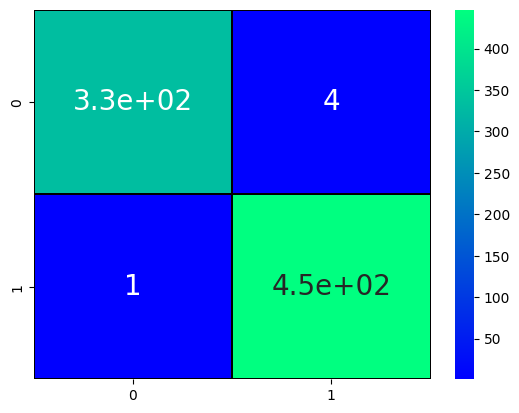

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
start_time = time.time()

model3 = rfc.fit(X_train, Y_train)

# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

prediction3 = model3.predict(X_test)
cm3=confusion_matrix(Y_test, prediction3)

print(cm3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
#print(round(accuracy_score(prediction3,Y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))
print('Testing F1-Score for Random Forest:',(2 * TP / (2 * TP + FN + FP)))

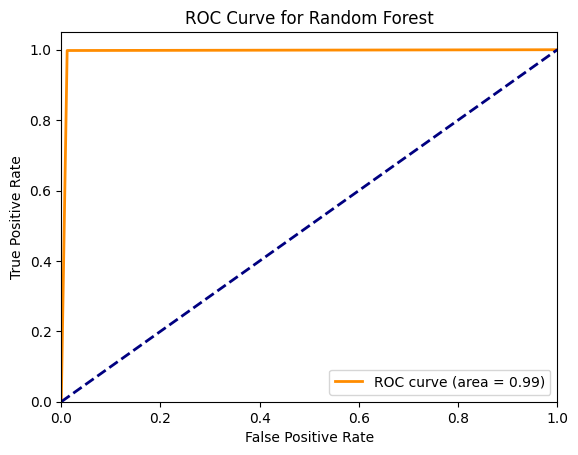

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction3)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction3))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       337
           1       0.99      1.00      0.99       448

    accuracy                           0.99       785
   macro avg       0.99      0.99      0.99       785
weighted avg       0.99      0.99      0.99       785



4.SVM

Elapsed time: 320.90 seconds
[[319  18]
 [  3 445]]
Testing Accuracy for SVM: 0.9732484076433121
Testing Sensitivity for SVM: 0.9906832298136646
Testing Specificity for SVM: 0.9611231101511879
Testing Precision for SVM: 0.9465875370919882
Testing F1-Score for SVM: 0.9681335356600911


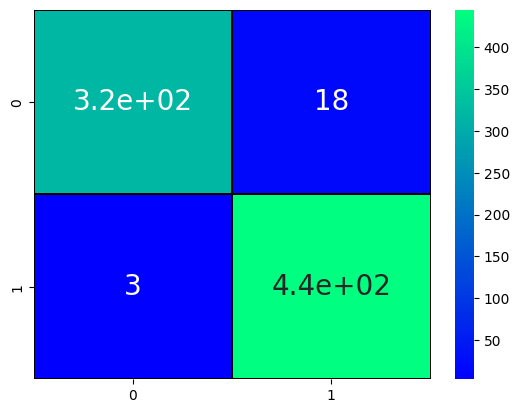

In [ ]:
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear',probability=True)
start_time = time.time()

model4=svm.fit(X_train,Y_train)

# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

prediction4=model4.predict(X_test)
cm4= confusion_matrix(Y_test,prediction4)
print(cm4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
print('Testing Specificity for SVM:',(TN/(TN+FP)))
print('Testing Precision for SVM:',(TP/(TP+FP)))
print('Testing F1-Score for SVM:',(2 * TP / (2 * TP + FN + FP)))

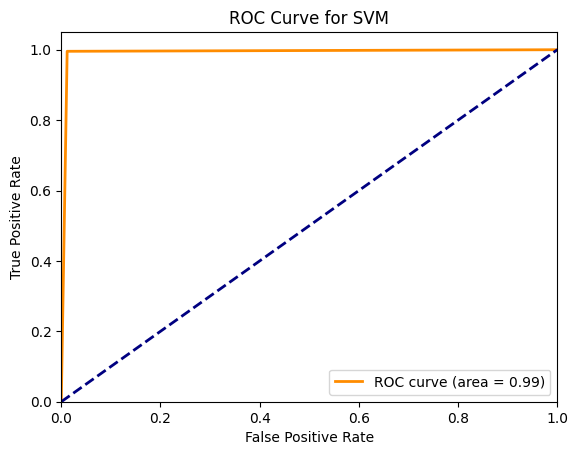

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction4)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(Y_test, prediction4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       0.99      1.00      0.99       448

    accuracy                           0.99       785
   macro avg       0.99      0.99      0.99       785
weighted avg       0.99      0.99      0.99       785



5.KNN

Elapsed time: 0.09 seconds
[[308  29]
 [  5 443]]
Testing Accuracy for KNN: 0.956687898089172
Testing Sensitivity for KNN: 0.9840255591054313
Testing Specificity for KNN: 0.9385593220338984
Testing Precision for KNN: 0.913946587537092
Testing F1-Score for KNN: 0.9476923076923077


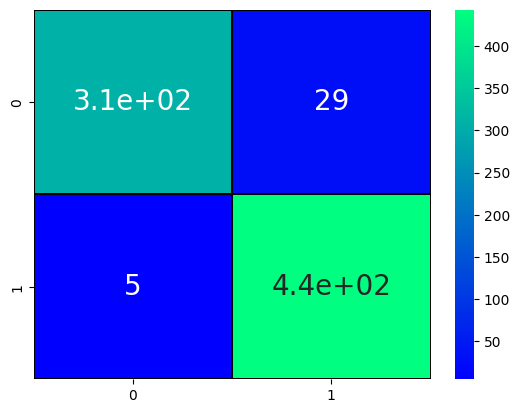

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
start_time = time.time()
model5=knn.fit(X_train, Y_train)

# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

prediction5=model5.predict(X_test)
cm5= confusion_matrix(Y_test,prediction5)
print(cm5)
sns.heatmap(cm5, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm5[0][0]
TN=cm5[1][1]
FN=cm5[1][0]
FP=cm5[0][1]

print('Testing Accuracy for KNN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for KNN:',(TP/(TP+FN)))
print('Testing Specificity for KNN:',(TN/(TN+FP)))
print('Testing Precision for KNN:',(TP/(TP+FP)))
print('Testing F1-Score for KNN:',(2 * TP / (2 * TP + FN + FP)))

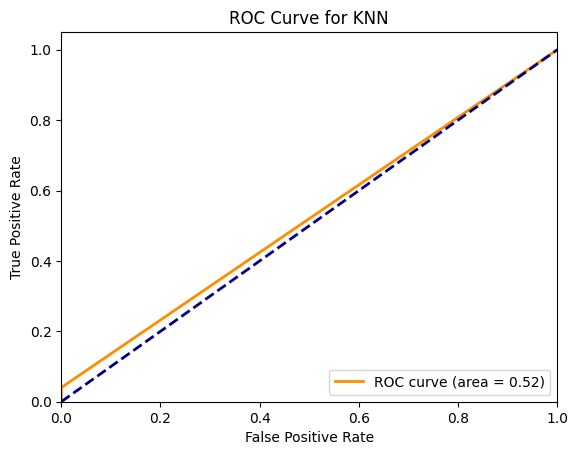

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction5)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(Y_test, prediction5))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61       337
           1       1.00      0.04      0.08       448

    accuracy                           0.45       785
   macro avg       0.72      0.52      0.34       785
weighted avg       0.76      0.45      0.31       785



6.LDA

Elapsed time: 118.64 seconds
[[285  52]
 [ 58 390]]
Testing Accuracy for LDA: 0.8598726114649682
Testing Sensitivity for LDA: 0.8309037900874635
Testing Specificity for LDA: 0.8823529411764706
Testing Precision for LDA: 0.8456973293768546
Testing F1-Score for LDA: 0.8382352941176471


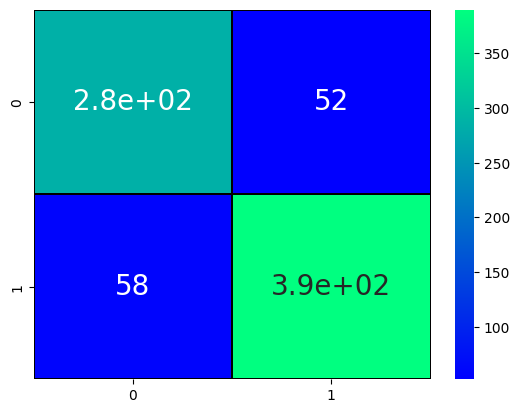

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=1)
start_time = time.time()
model6=lda.fit(X_train, Y_train)


# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))


prediction6=model6.predict(X_test)
cm6= confusion_matrix(Y_test,prediction6)
print(cm6)
sns.heatmap(cm6, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm6[0][0]
TN=cm6[1][1]
FN=cm6[1][0]
FP=cm6[0][1]

print('Testing Accuracy for LDA:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for LDA:',(TP/(TP+FN)))
print('Testing Specificity for LDA:',(TN/(TN+FP)))
print('Testing Precision for LDA:',(TP/(TP+FP)))
print('Testing F1-Score for LDA:',(2 * TP / (2 * TP + FN + FP)))

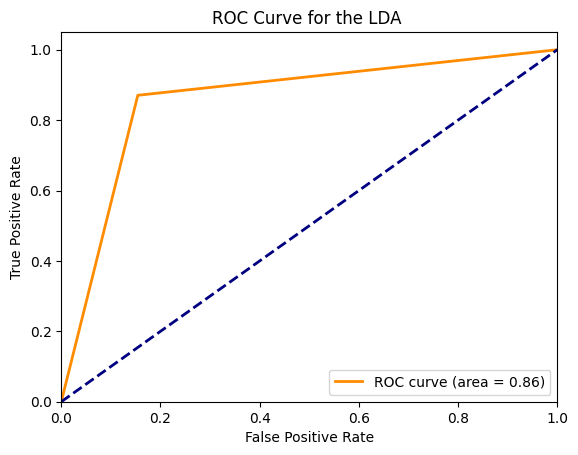

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction6)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the LDA ')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(Y_test, prediction6))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       337
           1       0.88      0.87      0.88       448

    accuracy                           0.86       785
   macro avg       0.86      0.86      0.86       785
weighted avg       0.86      0.86      0.86       785



7.XGBOOST

Elapsed time: 209.91 seconds
[[336   1]
 [  1 447]]
Testing Accuracy for XGB: 0.9974522292993631
Testing Sensitivity for XGB: 0.9970326409495549
Testing Specificity for XGB: 0.9977678571428571
Testing Precision for XGB: 0.9970326409495549
Testing F1-Score for XGB: 0.9970326409495549


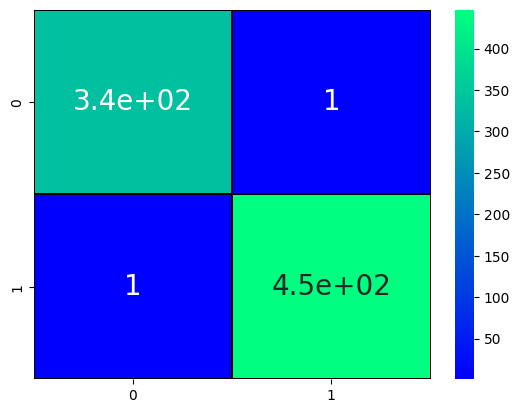

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

start_time = time.time()
model7=xgb.fit(X_train, Y_train)

# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

prediction7=model7.predict(X_test)
cm7= confusion_matrix(Y_test,prediction7)
print(cm7)
sns.heatmap(cm7, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm7[0][0]
TN=cm7[1][1]
FN=cm7[1][0]
FP=cm7[0][1]

print('Testing Accuracy for XGB:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for XGB:',(TP/(TP+FN)))
print('Testing Specificity for XGB:',(TN/(TN+FP)))
print('Testing Precision for XGB:',(TP/(TP+FP)))
print('Testing F1-Score for XGB:',(2 * TP / (2 * TP + FN + FP)))

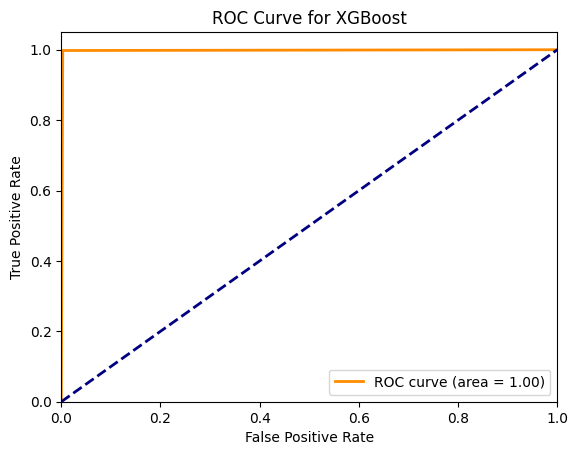

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction7)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(Y_test, prediction7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       448

    accuracy                           1.00       785
   macro avg       1.00      1.00      1.00       785
weighted avg       1.00      1.00      1.00       785



8.Adaboost

Elapsed time: 453.70 seconds
[[330   7]
 [  2 446]]
Testing Accuracy for AdaBoost Classifier: 0.9885350318471338
Testing Sensitivity for AdaBoost Classifier: 0.9939759036144579
Testing Specificity for AdaBoost Classifier: 0.9845474613686535
Testing Precision for AdaBoost Classifier: 0.9792284866468842
Testing F1-Score for AdaBoost Classifier: 0.9865470852017937


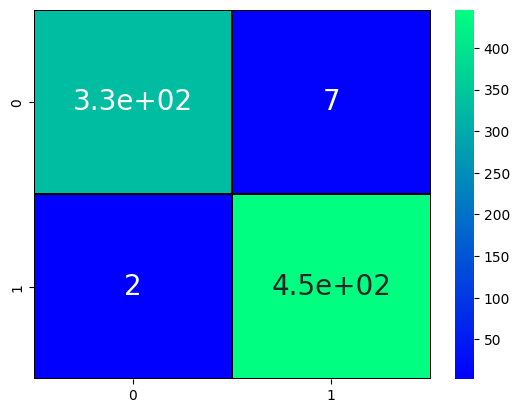

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(random_state=96)
start_time = time.time()
model8=adb.fit(X_train, Y_train)


# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))



prediction8=model8.predict(X_test)
cm8= confusion_matrix(Y_test,prediction8)
print(cm8)
sns.heatmap(cm8, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm8[0][0]
TN=cm8[1][1]
FN=cm8[1][0]
FP=cm8[0][1]

print('Testing Accuracy for AdaBoost Classifier:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for AdaBoost Classifier:',(TP/(TP+FN)))
print('Testing Specificity for AdaBoost Classifier:',(TN/(TN+FP)))
print('Testing Precision for AdaBoost Classifier:',(TP/(TP+FP)))
print('Testing F1-Score for AdaBoost Classifier:',(2 * TP / (2 * TP + FN + FP)))


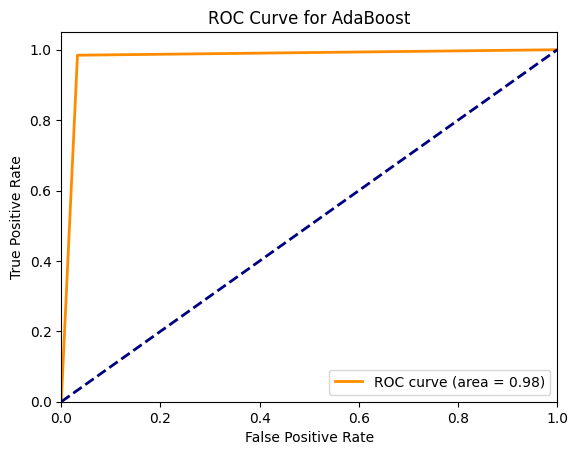

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction8)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(Y_test, prediction8))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       337
           1       0.98      1.00      0.99       448

    accuracy                           0.99       785
   macro avg       0.99      0.99      0.99       785
weighted avg       0.99      0.99      0.99       785



9.Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
model9= Sequential()
model9.add(Dense(11,activation='relu',input_dim=40000))
model9.add(Dense(1,activation='sigmoid'))

model9.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Train the model
start_time=time.time()
history = model9.fit(X_train, Y_train, epochs=100, verbose=0)
# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))




Elapsed time: 84.33 seconds


In [ ]:
prediction9 = model9.predict(X_test)
print(Y_test.dtype)
print(prediction9.dtype)

25/25 [==============================] - 0s 3ms/step
int64
float32


In [ ]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.5)

if Y_test.dtype == "float64" or Y_test.dtype == "float32":
    Y_test = binarizer.fit_transform(Y_test)

if prediction9.dtype == "float64" or prediction9.dtype == "float32":
    prediction9 = binarizer.fit_transform(prediction9)

In [ ]:
cm9 = confusion_matrix(Y_test, prediction9)
print(cm9)

[[328   9]
 [  2 446]]


[[328   9]
 [  2 446]]
Testing Accuracy for Neural Network: 0.9859872611464968
Testing Sensitivity for Neural Network: 0.9939393939393939
Testing Specificity for Neural Network: 0.9802197802197802
Testing Precision for Neural Network: 0.973293768545994
Testing F1-Score for Neural Network: 0.9835082458770614


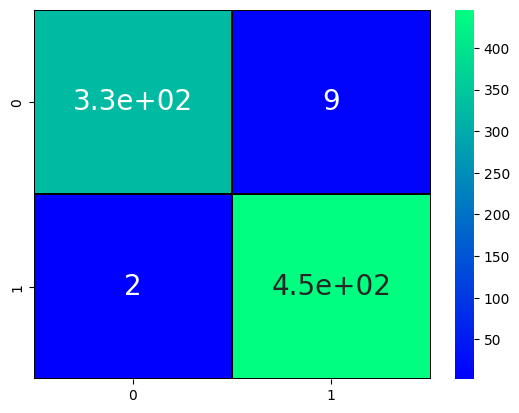

In [ ]:
cm9= confusion_matrix(Y_test,prediction9)
print(cm9)
sns.heatmap(cm9, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm9[0][0]
TN=cm9[1][1]
FN=cm9[1][0]
FP=cm9[0][1]

print('Testing Accuracy for Neural Network:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Neural Network:',(TP/(TP+FN)))
print('Testing Specificity for Neural Network:',(TN/(TN+FP)))
print('Testing Precision for Neural Network:',(TP/(TP+FP)))
print('Testing F1-Score for Neural Network:',(2 * TP / (2 * TP + FN + FP)))



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction9))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       0.99      1.00      0.99       448

    accuracy                           0.99       785
   macro avg       0.99      0.99      0.99       785
weighted avg       0.99      0.99      0.99       785



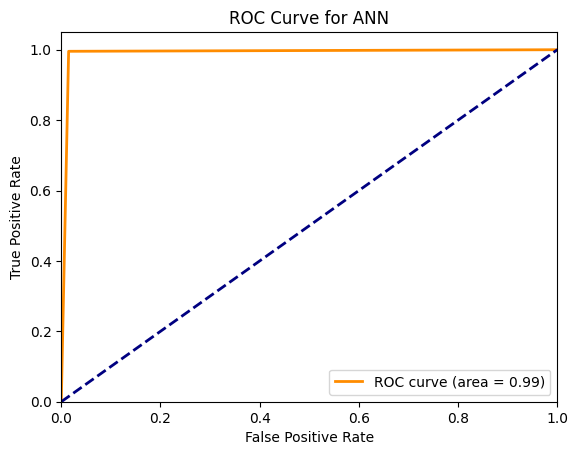

In [ ]:

# Calculate the false positive rate and true positive rate for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction9)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN')
plt.legend(loc="lower right")

plt.show()

10.Naive bayes

Elapsed time: 1.69 seconds
[[272  65]
 [  7 441]]
Testing Accuracy for Naive Baiyes: 0.9082802547770701
Testing Sensitivity for Naive Baiyes: 0.974910394265233
Testing Specificity for Naive Baiyes: 0.8715415019762845
Testing Precision for Naive Baiyes: 0.8071216617210683
Testing F1-Score for Naive Baiyes: 0.8831168831168831


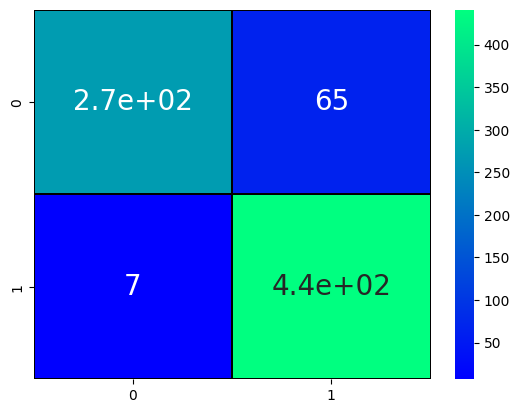

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

start_time=time.time()

model10=nb.fit(X_train, Y_train)
# Get the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Y_pred_nb = nb.predict(X_test)
prediction10=model10.predict(X_test)
cm10= confusion_matrix(Y_test,prediction10)
print(cm10)
sns.heatmap(cm10, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm10[0][0]
TN=cm10[1][1]
FN=cm10[1][0]
FP=cm10[0][1]

print('Testing Accuracy for Naive Baiyes:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Naive Baiyes:',(TP/(TP+FN)))
print('Testing Specificity for Naive Baiyes:',(TN/(TN+FP)))
print('Testing Precision for Naive Baiyes:',(TP/(TP+FP)))
print('Testing F1-Score for Naive Baiyes:',(2 * TP / (2 * TP + FN + FP)))

In [ ]:
print(classification_report(Y_test, prediction10))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       337
           1       0.80      0.75      0.77       448

    accuracy                           0.75       785
   macro avg       0.75      0.75      0.75       785
weighted avg       0.76      0.75      0.75       785



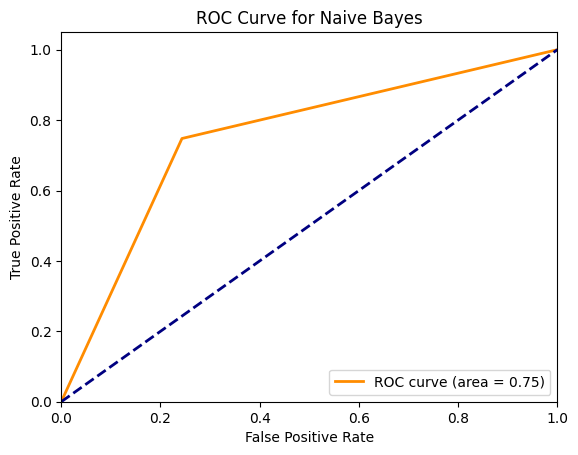

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prediction10)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

TEST Model

In [ ]:
dec = {0:'notumor', 1:'tumor'}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])


In [ ]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

classes = {'notumor': 0, 'tumor': 1}
dec = {0: 'notumor', 1: 'tumor'}

X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

X = np.array(X)
Y = np.array(Y)

# Reshape the data to have 2 dimensions
X = X.reshape(len(X), -1)

# Create the KNeighborsClassifier model
model5 = KNeighborsClassifier(n_neighbors=5)

# Train the model
model5.fit(X, Y)

# Predict the class of the new image
p = model5.predict(X)



notumor


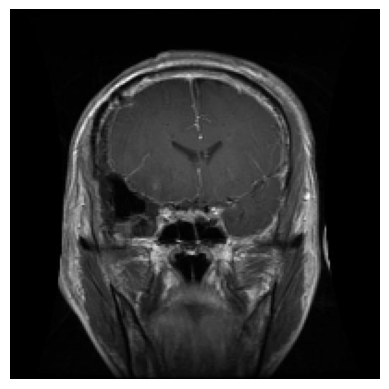

In [ ]:
# Print the predicted class
print(dec[p[8]])
plt.imshow(img, cmap='gray')
plt.axis('off')
c+=1

ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.

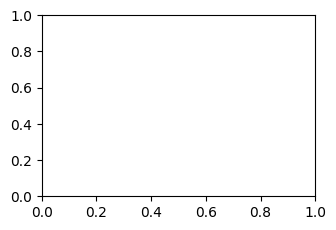

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Dataset/')
c=2
X = []
Y = []
for i in os.listdir('/content/drive/MyDrive/Dataset/notumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/drive/MyDrive/Dataset/notumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    #img1 = img1.reshape(-1, 20736)/255 # Reshape the input data
    X.append(img)
    Y.append(classes[cls])
    X = np.array(X)
    Y = np.array(Y)
    #X = X.reshape(len(X), -1)
    p = model5.predict(X)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Dataset/')
c=1
for i in os.listdir('/content/drive/MyDrive/Dataset/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/MyDrive/Dataset/tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

Chart

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc



# Data provided

data = {

    'SVM': {'HOG': [319, 18, 3, 445], 'LBP': [331, 6, 0, 448], 'Image Data': [333, 4, 2, 446]},

    'LR': {'HOG': [319, 18, 3, 445], 'LBP': [331, 6, 0, 448], 'Image Data': [333, 4, 2, 446]},

    'KNN': {'HOG': [320, 17, 9, 439], 'LBP': [324, 12, 1, 447], 'Image Data': [337, 0, 430, 18]},

    'NB': {'HOG': [330, 7, 2, 450], 'LBP': [276, 61, 72, 376], 'Image Data': [255, 82, 113, 335]},

    'DT': {'HOG': [306, 31, 10, 438], 'LBP': [295, 42, 37, 411], 'Image Data': [303, 34, 27, 421]},

    'RF': {'HOG': [333, 4, 1, 447], 'LBP': [319, 18, 0, 448], 'Image Data': [325, 12, 2, 446]},

}



# Calculate TPR and FPR

def calculate_tpr_fpr(tp, tn, fp, fn):

    tpr = tp / (tp + fn)

    fpr = fp / (fp + tn)

    return tpr, fpr



# Prepare data for ROC curves

roc_data = {method: {feat: calculate_tpr_fpr(*data[method][feat]) for feat in data[method]} for method in data}



# Plotting ROC curves

plt.figure(figsize=(14, 10))



for method in roc_data:

    for feature in roc_data[method]:

        tpr, fpr = roc_data[method][feature]

        # Adding points for plotting

        fpr_values = [0, fpr, 1]

        tpr_values = [0, tpr, 1]

        plt.plot(fpr_values, tpr_values, label=f'{method} - {feature} (AUC = {auc(fpr_values, tpr_values):.2f})')



plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curves and AUC for different ML algorithms and Feature Extractions')

plt.legend(loc="lower right")

plt.show()